In [18]:
# description
# https://www.kaggle.com/c/boston-housing

# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

sequential은 필수로 불러와야 함. Dense는 fully connect될 때 쓰기. 

In [19]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.boston_housing.load_data(path='boston_housing.npz')

x는 왼쪽, y는 오른쪽에 있는 동그라미(node). x는 13개의 인자들, y는 집값. train과 test각각에 그렇게 들어가 있음.

In [20]:
x_train.shape
y_train.shape
x_train.shape
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

y테스트가 어떻게 생겼는지 볼 수 있음.

x_train.shape: 13개 짜리의 벡터가 404개.

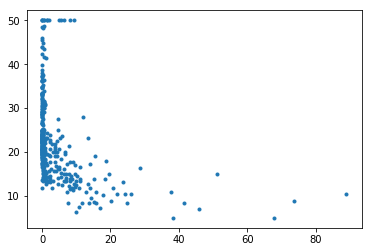

In [24]:
plt.plot(x_train[:,0], y_train, '.')

[:,0]하면 맨 처음 x인자인 crim.
non-linearity가 들어가있음을 알 수 있음. x와 y가 관계가 있다는 것도. --> 즉 x와 y사이에는 nonlinear한 관계가 있다.

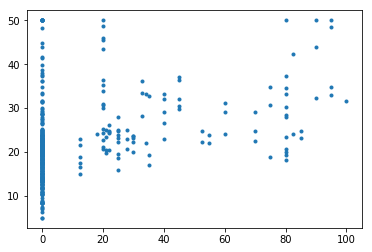

In [25]:
plt.plot(x_train[:,1], y_train, '.')

두번째는 zn
residential이 없으면 값이 떨어지는 경향성이 보임. 0인데 50인 건 명동 같은 경우. 주거지 아니어도 땅값은 높음.

In [30]:
model = Sequential()
model.add(Dense(1, input_shape=[13]))
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


model.add(Dense(1, input_shape=[13])) --> 이걸 보는 순간 입력이 13개, 출력이 하나, 각자 다 연결이 되어 있다는 걸 알아야 함.
화살표에 있는 값들이 훈련 대상.
regression의 경우에는 rmsprop, mse적으면 됨.
밑에 summary하면 그 결과 보여줌.

Parameter에 왜 14일까? --> 화살표가 하나인 경우를 생각해보면 수식은 y = ax가 아니라 y = ax + b. 이 경우도 맨 마지막에 1이 붙어서 그 1도 훈련 대상이기 때문에 13에서 하나 더해진 14인 것.

In [31]:
model.fit(x_train, y_train, epochs=1)

404/404 [==============================] - 0s 984us/sample - loss: 74234.5106


loss는 epoch 수가 늘어날수록 줄어듦.

In [29]:
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
404/404 [==============================] - 0s 79us/sample - loss: 28.8902
Epoch 2/2
404/404 [==============================] - 0s 45us/sample - loss: 28.5338


In [36]:
model = Sequential()
model.add(Dense(10, input_shape=[13], activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


히든 레이어 한개, 노드는 열개.

140은 뭐고 11은 뭔지 알아야 함.

Parameter는 화살표. y = ax + b 에서 a가 parameter

총 13개의 입력(x) + 1 (상수 부분) 각각 10개의 화살표 --> 따라서 140

Hidden layer에도 입력에서처럼 1을 따로 consider 해야 함.

아웃풋 노드는 이 경우 하나. 그래서 히든 레이어 총 10개의 노드 + 1 --> 총 11개

1을 무조건 붙인다는 걸 아는 게 중요!

즉, x --> hidden --> y 에서, (14 x 10) = 140, (11 x 1) = 11

Parameter를 셀 때, 즉 화살표를 만들 때에는 꼭 1을 붙인다!

activation은 히든 레이어에 줄 수 있음. activation relu(꼭 relu 아니고 줄 수 있는 건 다 줄 수 있음)하면 성능이 더 좋아짐. 어떤 activation을 넣었다고 해서 꼭 좋아진다는 건 아님.

Regression이면 --> X
Binary classification이면 --> Sigmoid (둘중하나 고르기)
Multiple classification이면 --> Softmax(여러개중 하나 고르기)

이 경우에는 input에만 activation을 주고, output은 어차피 하나라서 activation을 주지 않음.

In [37]:
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
404/404 [==============================] - 1s 2ms/sample - loss: 14014.4442
Epoch 2/1000
404/404 [==============================] - 0s 102us/sample - loss: 10598.2811
Epoch 3/1000
404/404 [==============================] - 0s 101us/sample - loss: 8419.1464
Epoch 4/1000
404/404 [==============================] - 0s 84us/sample - loss: 6813.6144
Epoch 5/1000
404/404 [==============================] - 0s 73us/sample - loss: 5574.6344
Epoch 6/1000
404/404 [==============================] - 0s 103us/sample - loss: 4597.7162
Epoch 7/1000
404/404 [==============================] - 0s 89us/sample - loss: 3828.1249
Epoch 8/1000
404/404 [==============================] - 0s 108us/sample - loss: 3225.4985
Epoch 9/1000
404/404 [==============================] - 0s 89us/sample - loss: 2782.5222
Epoch 10/1000
404/404 [==============================] - 0s 41us/sample - loss: 2420.3686
Epoch 11/1000
404/404 [==============================] - 0s 119us/sample - loss: 2115.4813
Epoch 12/1000

404/404 [==============================] - 0s 67us/sample - loss: 38.8422
Epoch 185/1000
404/404 [==============================] - 0s 84us/sample - loss: 38.6937
Epoch 186/1000
404/404 [==============================] - 0s 66us/sample - loss: 39.0461
Epoch 187/1000
404/404 [==============================] - 0s 86us/sample - loss: 39.2194
Epoch 188/1000
404/404 [==============================] - 0s 91us/sample - loss: 38.7715
Epoch 189/1000
404/404 [==============================] - 0s 61us/sample - loss: 39.4503
Epoch 190/1000
404/404 [==============================] - 0s 89us/sample - loss: 38.4901
Epoch 191/1000
404/404 [==============================] - 0s 35us/sample - loss: 39.0797
Epoch 192/1000
404/404 [==============================] - 0s 107us/sample - loss: 38.6008
Epoch 193/1000
404/404 [==============================] - 0s 77us/sample - loss: 38.3830
Epoch 194/1000
404/404 [==============================] - 0s 79us/sample - loss: 38.8903
Epoch 195/1000
404/404 [===========

404/404 [==============================] - 0s 73us/sample - loss: 37.4457
Epoch 277/1000
404/404 [==============================] - 0s 76us/sample - loss: 35.7922
Epoch 278/1000
404/404 [==============================] - 0s 100us/sample - loss: 36.1135
Epoch 279/1000
404/404 [==============================] - 0s 105us/sample - loss: 36.5166
Epoch 280/1000
404/404 [==============================] - 0s 38us/sample - loss: 35.6013
Epoch 281/1000
404/404 [==============================] - 0s 91us/sample - loss: 35.6010
Epoch 282/1000
404/404 [==============================] - 0s 65us/sample - loss: 37.0077
Epoch 283/1000
404/404 [==============================] - 0s 93us/sample - loss: 36.0017
Epoch 284/1000
404/404 [==============================] - 0s 81us/sample - loss: 36.1498
Epoch 285/1000
404/404 [==============================] - 0s 81us/sample - loss: 35.2598
Epoch 286/1000
404/404 [==============================] - 0s 94us/sample - loss: 37.1202
Epoch 287/1000
404/404 [==========

404/404 [==============================] - 0s 88us/sample - loss: 34.1194
Epoch 369/1000
404/404 [==============================] - 0s 56us/sample - loss: 33.8926
Epoch 370/1000
404/404 [==============================] - 0s 62us/sample - loss: 33.8917
Epoch 371/1000
404/404 [==============================] - 0s 106us/sample - loss: 33.6584
Epoch 372/1000
404/404 [==============================] - 0s 89us/sample - loss: 33.4264
Epoch 373/1000
404/404 [==============================] - 0s 82us/sample - loss: 34.2596
Epoch 374/1000
404/404 [==============================] - 0s 98us/sample - loss: 33.5602
Epoch 375/1000
404/404 [==============================] - 0s 101us/sample - loss: 34.6676
Epoch 376/1000
404/404 [==============================] - 0s 86us/sample - loss: 33.4353
Epoch 377/1000
404/404 [==============================] - 0s 91us/sample - loss: 33.3948
Epoch 378/1000
404/404 [==============================] - 0s 82us/sample - loss: 33.3009
Epoch 379/1000
404/404 [==========

404/404 [==============================] - 0s 80us/sample - loss: 30.7372
Epoch 552/1000
404/404 [==============================] - 0s 88us/sample - loss: 30.2969
Epoch 553/1000
404/404 [==============================] - 0s 63us/sample - loss: 29.9540
Epoch 554/1000
404/404 [==============================] - 0s 48us/sample - loss: 30.7160
Epoch 555/1000
404/404 [==============================] - 0s 101us/sample - loss: 30.4063
Epoch 556/1000
404/404 [==============================] - 0s 88us/sample - loss: 29.7443
Epoch 557/1000
404/404 [==============================] - 0s 90us/sample - loss: 30.5820
Epoch 558/1000
404/404 [==============================] - 0s 86us/sample - loss: 31.2225
Epoch 559/1000
404/404 [==============================] - 0s 85us/sample - loss: 30.3027
Epoch 560/1000
404/404 [==============================] - 0s 86us/sample - loss: 30.1746
Epoch 561/1000
404/404 [==============================] - 0s 69us/sample - loss: 30.5188
Epoch 562/1000
404/404 [===========

404/404 [==============================] - 0s 74us/sample - loss: 29.3019
Epoch 644/1000
404/404 [==============================] - 0s 53us/sample - loss: 29.3711
Epoch 645/1000
404/404 [==============================] - 0s 82us/sample - loss: 29.0789
Epoch 646/1000
404/404 [==============================] - 0s 70us/sample - loss: 29.2591
Epoch 647/1000
404/404 [==============================] - 0s 101us/sample - loss: 29.3469
Epoch 648/1000
404/404 [==============================] - 0s 54us/sample - loss: 29.9928
Epoch 649/1000
404/404 [==============================] - 0s 43us/sample - loss: 29.1192
Epoch 650/1000
404/404 [==============================] - 0s 84us/sample - loss: 30.3122
Epoch 651/1000
404/404 [==============================] - 0s 76us/sample - loss: 28.2757
Epoch 652/1000
404/404 [==============================] - 0s 19us/sample - loss: 28.0969
Epoch 653/1000
404/404 [==============================] - 0s 101us/sample - loss: 29.5873
Epoch 654/1000
404/404 [==========

404/404 [==============================] - 0s 84us/sample - loss: 27.9331
Epoch 827/1000
404/404 [==============================] - 0s 69us/sample - loss: 27.6997
Epoch 828/1000
404/404 [==============================] - 0s 55us/sample - loss: 27.6748
Epoch 829/1000
404/404 [==============================] - 0s 43us/sample - loss: 28.2150
Epoch 830/1000
404/404 [==============================] - 0s 118us/sample - loss: 27.8350
Epoch 831/1000
404/404 [==============================] - 0s 45us/sample - loss: 27.5191
Epoch 832/1000
404/404 [==============================] - 0s 77us/sample - loss: 27.4249
Epoch 833/1000
404/404 [==============================] - 0s 82us/sample - loss: 27.5137
Epoch 834/1000
404/404 [==============================] - 0s 42us/sample - loss: 28.2528
Epoch 835/1000
404/404 [==============================] - 0s 124us/sample - loss: 28.4355
Epoch 836/1000
404/404 [==============================] - 0s 77us/sample - loss: 28.0339
Epoch 837/1000
404/404 [==========

loss가 점점 줄어드는 것을 확인할 수 있음. --> target과 실제가 가까워진다는 뜻. 이것이 인공지능 전문가들이 해야할 일.

In [ ]:
linear한 hidden layer는 넣어도 의미가 없음.

nonlinear한 relu를 넣었더니 loss가 줄어듦. --> 더 좋아짐.

In [33]:
model = Sequential()
model.add(Dense(10, input_shape=[13]))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 1ms/sample - loss: 31.0418


31.041782753140318

In [15]:
print(model.input_shape)
print(model.output_shape)

(None, 13)
(None, 1)


In [16]:
# INPUT::
# 1. crim: per capita crime rate by town.
# 2. zn: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. indus: proportion of non-retail business acres per town.
# 4. chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# 5. nox: nitrogen oxides concentration (parts per 10 million).
# 6. rm: average number of rooms per dwelling.
# 7. age: proportion of owner-occupied units built prior to 1940.
# 8. dis: weighted mean of distances to five Boston employment centres.
# 9. rad: index of accessibility to radial highways.
# 10. tax: full-value property-tax rate per $10,000.
# 11. ptratio: pupil-teacher ratio by town.
# 12. black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# 13. lstat: lower status of the population (percent).

# TARGET::
# medv: median value of owner-occupied homes in $1000s.

model.predict(np.array([0, 1, 50, 1, 0, 5, .5, 10, 1000, 100, 10, 100, 1]).reshape(1,13))

array([[200.99327]], dtype=float32)

<function matplotlib.pyplot.show(*args, **kw)>

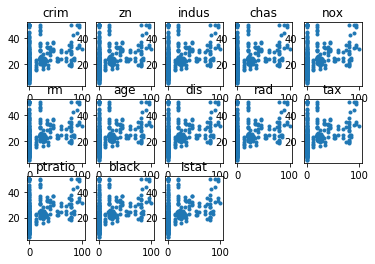

In [27]:
boston_housing = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'Istat']
for i in range(13):
    plt.subplot(3,5,i+1)
    plt.plot(x_train[:,1], y_train, '.')
    plt.title(boston_housing[i])
plt.show

nox: 높을수록 반비례해서 집값이 떨어짐.
rm: 완전히 linear하게 정비례. 방의 개수가 많을수록 집값이 올라감.
black: 단순 흑인 수가 아니라 정해진 수식에 따른 결과여서 흑인 수와의 관계를 보여주고 있는 것이 아님.
Istat: 집값과 반비례.
tax: tax가 높으면 집값이 떨어짐. 미국의 tax system과 관련. 이를테면 우리 동네에 삼성 건물이 들어온다면 그 동네 세금은 삼성이 다 내기 때문에 세금이 낮아짐. 동네는 부자가 되고. 그래서 오히려 못 사는 동네에서 세금이 높은 현상이 발생.

plt.plot(x_train[:,1], y_train, '.')
이거를 각각 해보면(위에서 조금 해봄) 좀 더 크고 자세히 볼 수 있음.